In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/archive (9)/players_away_matches.csv')
df = df[df["minutes"] > 0]
df.head()
workload_features = [
    "pressures", "touches", "xg", "xa",
    "progressive_carries", "progressive_passes", "progressive_passes_received",
    "carry_progressive_distance", "pressure_regains", "dribbles",
    "dribble_tackles", "carries", "carries_into_final_third",
    "carries_into_penalty_area", "ball_recoveries", "carry_distance", "matchWeek",
    "aerials_won", "aerials_won_pct"
]
workload_target = ["minutes"]
df_filtered = df[workload_features]
print(df_filtered.isnull().sum())  # Check missing values in features
print(df[workload_target].isnull().sum())  # Check missing values in target
print(df_filtered.dtypes)
print(df[workload_target].dtypes)

pressures                         40
touches                           40
xg                                40
xa                                40
progressive_carries               68
progressive_passes                40
progressive_passes_received       40
carry_progressive_distance        40
pressure_regains                  40
dribbles                          40
dribble_tackles                   40
carries                           40
carries_into_final_third          68
carries_into_penalty_area         68
ball_recoveries                   40
carry_distance                    40
matchWeek                          0
aerials_won                       40
aerials_won_pct                22716
dtype: int64
minutes    0
dtype: int64
pressures                      float64
touches                        float64
xg                             float64
xa                             float64
progressive_carries            float64
progressive_passes             float64
progressive_passes_recei

In [ ]:
df_filtered = df[workload_features].fillna(0)
print(df_filtered.isnull().sum())

pressures                      0
touches                        0
xg                             0
xa                             0
progressive_carries            0
progressive_passes             0
progressive_passes_received    0
carry_progressive_distance     0
pressure_regains               0
dribbles                       0
dribble_tackles                0
carries                        0
carries_into_final_third       0
carries_into_penalty_area      0
ball_recoveries                0
carry_distance                 0
matchWeek                      0
aerials_won                    0
aerials_won_pct                0
dtype: int64


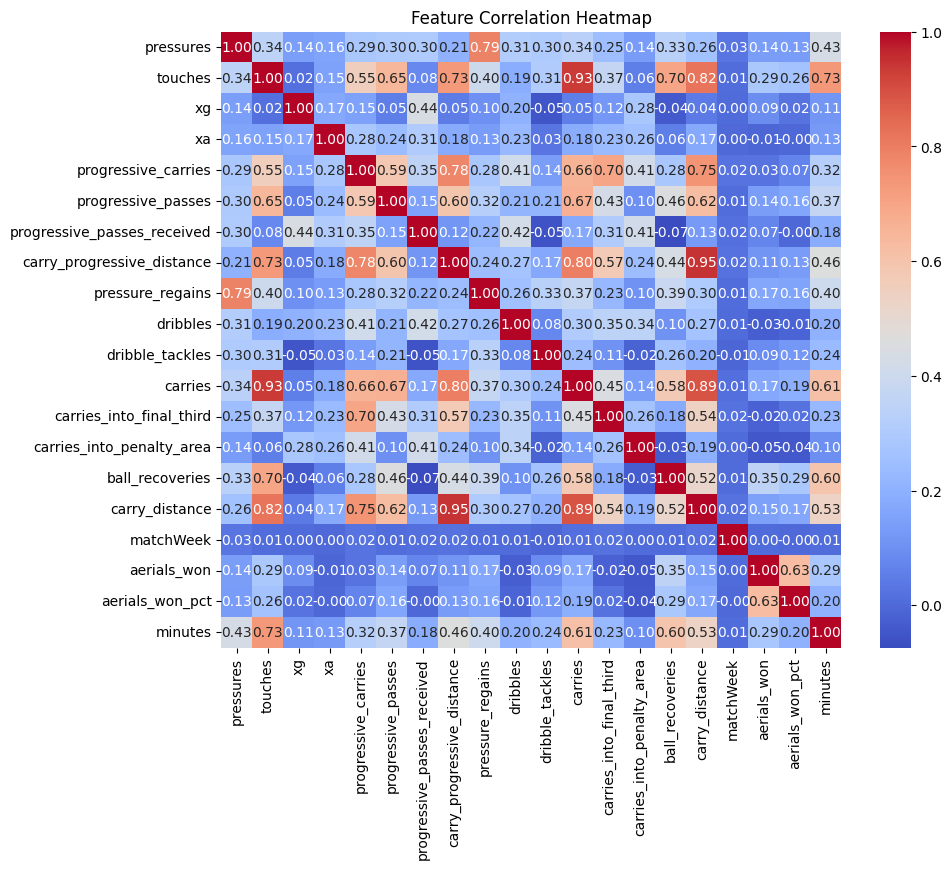

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_filtered.join(df[workload_target]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df_filtered.drop(["matchWeek", "carries_into_penalty_area", "progressive_passes_received", "carry_progressive_distance", "xg", "xa"], axis=1, inplace=True)
workload_features.remove("matchWeek")
workload_features.remove("carries_into_penalty_area")
workload_features.remove("progressive_passes_received")
workload_features.remove("carry_progressive_distance")
workload_features.remove("xg")
workload_features.remove("xa")

In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

workload_features = df_filtered.columns.tolist()
joblib.dump(workload_features, "feature_order.pkl")

# Standardization
scaler_standard = StandardScaler()
X = pd.DataFrame(scaler_standard.fit_transform(df_filtered), columns=workload_features)

# Save the StandardScaler
joblib.dump(scaler_standard, "standard_scaler.pkl")

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df["minutes"] = scaler_minmax.fit_transform(df[["minutes"]])
y = df["minutes"]

# Save the MinMaxScaler
joblib.dump(scaler_minmax, "minmax_scaler.pkl")


# Save the transformed datasets
X.to_csv("X_transformed.csv", index=False)
df.to_csv("df_transformed.csv", index=False)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Training Performance:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"R² Score: {train_r2}")

print("\nTest Performance:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"R² Score: {test_r2}")

Training Performance:
MAE: 0.16535868176061772
MSE: 0.03907228027487642
R² Score: 0.6523690373626808

Test Performance:
MAE: 0.16493835027995643
MSE: 0.03887348303776988
R² Score: 0.6566026592752652


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Training Performance:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"R² Score: {train_r2}")

print("\nTest Performance:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"R² Score: {test_r2}")

Training Performance:
MAE: 0.030689774715691197
MSE: 0.0023146962019061283
R² Score: 0.9794058584955695

Test Performance:
MAE: 0.08097077876802877
MSE: 0.014813493500691837
R² Score: 0.8691417933906714


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import joblib

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search with Cross Validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=5, n_jobs=-1, verbose=2,
                                   scoring='r2', random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", random_search.best_params_)

# Use the best model
best_model = random_search.best_estimator_
joblib.dump(best_model, "best_random_forest_model.pkl")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 183}


['best_random_forest_model.pkl']

In [ ]:
# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Training Performance:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"R² Score: {train_r2}")

print("\nTest Performance:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"R² Score: {test_r2}")

Training Performance:
MAE: 0.030689774715691197
MSE: 0.0023146962019061283
R² Score: 0.9794058584955695

Test Performance:
MAE: 0.08097077876802877
MSE: 0.014813493500691837
R² Score: 0.8691417933906714


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Training Performance:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"R² Score: {train_r2}")

print("\nTest Performance:")
print(f"MAE: {test_mae}")
print(f"MSE: {test_mse}")
print(f"R² Score: {test_r2}")

# Save the model using joblib
joblib.dump(model, "trained_model.pkl")
print("\nModel saved as trained_model.pkl")

# Load the model (for verification)
loaded_model = joblib.load("trained_model.pkl")

# Make predictions with the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print("\nModel loaded and tested successfully.")



Training Performance:
MAE: 0.0838076588184352
MSE: 0.015426089379508972
R² Score: 0.8627521541358264

Test Performance:
MAE: 0.08380546922211893
MSE: 0.015399770706171306
R² Score: 0.8639627865830343

Model saved as trained_model.pkl

Model loaded and tested successfully.
